<a href="https://colab.research.google.com/github/sjw8793/DS2023-HateCrimeAnalysis/blob/main/HateCrime_Normalization_by_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/SSU2023_1/DataScience"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/SSU2023_1/DataScience


In [60]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import plotly.express as px

In [61]:
# GPU사용
import torch
import torchvision

!pip install --upgrade torch
torch.cuda.is_available()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cusolver_cu11-11.4.0.1-2-py3-none-manylinux1_x86_64.whl (102.6 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 2.0.1 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 2.0.1 which is incompatible.
torchvision 0.15.1+cu118 requires torch==2.0

True

In [62]:
df = pd.read_excel('hate_crime_dataset.xlsx')

In [63]:
df.head()

,data_year,state_abbr,state_name,division_name,region_name,population_group_code,population_group_description,incident_date,total_offender_count,offender_race,victim_count,offense_name,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,2017,AK,Alaska,Pacific,West,4,"Cities from 25,000 thru 49,999",2017-12-22,1,Others,1,Simple Assault,Residence/Home,Anti-White,Individual,S,S
1,2017,AK,Alaska,Pacific,West,4,"Cities from 25,000 thru 49,999",2017-10-24,0,Unknown,1,Destruction/Damage/Vandalism of Property,School-College/University,"Anti-Multiple Races, Group",Government,S,S
2,2017,AK,Alaska,Pacific,West,8A,"Non-MSA counties 100,000 or over",2017-05-04,0,Unknown,1,Destruction/Damage/Vandalism of Property,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,S,S
3,2017,AK,Alaska,Pacific,West,1C,"Cities from 250,000 thru 499,999",2017-10-29,1,Black or African American,1,Aggravated Assault,Amusement Park,Anti-White,Individual,S,S
4,2017,AL,Alabama,East South Central,South,7,"Cities under 2,500",2017-09-23,1,Black or African American,1,Intimidation,School-College/University,Anti-White,Individual,S,S


In [64]:
print(df.dtypes)

data_year                                int64
state_abbr                              object
state_name                              object
division_name                           object
region_name                             object
population_group_code                   object
population_group_description            object
incident_date                   datetime64[ns]
total_offender_count                     int64
offender_race                           object
victim_count                             int64
offense_name                            object
location_name                           object
bias_desc                               object
victim_types                            object
multiple_offense                        object
multiple_bias                           object
dtype: object


In [65]:
df.isna().sum()

data_year                       0
state_abbr                      0
state_name                      0
division_name                   0
region_name                     0
population_group_code           0
population_group_description    0
incident_date                   0
total_offender_count            0
offender_race                   0
victim_count                    0
offense_name                    0
location_name                   0
bias_desc                       0
victim_types                    0
multiple_offense                0
multiple_bias                   0
dtype: int64

In [66]:
# # '/'를 포함한 값을 가진 행 제외한 데이터프레임 생성
# filtered_dataset = dataset[~dataset.select_dtypes(include='object').apply(lambda x: x.str.contains('/')).any(axis=1)]
# filtered_dataset = filtered_dataset[~filtered_dataset.select_dtypes(include='int').apply(lambda x: x.apply(lambda y: '/' in str(y))).any(axis=1)]
# # 결과 출력
# print(filtered_dataset)

In [67]:
# print('/처리 전 : ', dataset.info())
# print('/처리 후 : ', filtered_dataset.info())

##2017~2021 년도별 각 주의 hate_crimes 건 수

In [68]:
df2 = df.groupby(['data_year', 'state_abbr', 'state_name']).agg(hate_crime_case = ('state_name', 'size'), number_of_victims = ('victim_count', 'sum'), NUMBER_OF_OFFENDERS = ('total_offender_count', 'sum'))
agg_data = pd.DataFrame(df2).reset_index()
agg_data.columns = ['data_year', 'state_abbr', 'state_name', 'hate_crime_case','number_of_victims', 'number_of_offenders']
agg_data

,data_year,state_abbr,state_name,hate_crime_case,number_of_victims,number_of_offenders
0,2017,AK,Alaska,4,4,2
1,2017,AL,Alabama,14,14,11
2,2017,AR,Arkansas,24,27,28
3,2017,AZ,Arizona,264,357,242
4,2017,CA,California,1094,1316,1014
...,...,...,...,...,...,...
253,2021,VT,Vermont,39,46,29
254,2021,WA,Washington,576,748,412
255,2021,WI,Wisconsin,111,121,105
256,2021,WV,West Virginia,56,75,44


In [69]:
fig=px.choropleth(agg_data,
                  locations = 'state_abbr',        
                  animation_frame = 'data_year',       
                  color = 'hate_crime_case',  
                  color_continuous_scale = 'inferno',
                  locationmode = "USA-states",
                  title='Hate Crime cases of each States (2017 - 2021)',
                  scope="usa",
                  hover_name="state_name",
                  hover_data = ['number_of_victims', 'number_of_offenders'],
                  height=700)

fig.update_layout(coloraxis_colorbar_title_text = 'Number of Cases')

fig.show()

In [70]:
# 년도별로 데이터 묶기
df_2017 = agg_data[agg_data['data_year'] == 2017]
df_2018 = agg_data[agg_data['data_year'] == 2018]
df_2019 = agg_data[agg_data['data_year'] == 2019]
df_2020 = agg_data[agg_data['data_year'] == 2020]
df_2021 = agg_data[agg_data['data_year'] == 2021]

## 2017~2021 지역별 각 주의 증오범죄 사건, 피해자 및 범죄자의 총 수

In [71]:
df3 = df.groupby(['state_name']).agg(hate_crime_case = ('state_name', 'size'), number_of_victims = ('victim_count', 'sum'), number_of_offenders = ('total_offender_count', 'sum'))
agg_data2 = pd.DataFrame(df3).reset_index()
agg_data2.columns = ['state_name', 'hate_crime_case','number_of_victims', 'number_of_offenders']
agg_data2

,state_name,hate_crime_case,number_of_victims,number_of_offenders
0,Alabama,284,316,268
1,Alaska,39,53,39
2,Arizona,1016,1292,839
3,Arkansas,128,146,137
4,California,4586,5508,4379
5,Colorado,974,1296,1041
6,Connecticut,473,568,325
7,Delaware,94,112,79
8,District of Columbia,804,897,857
9,Federal,553,1411,542


In [72]:
population_dataset = pd.read_csv("Population_Estimates.csv")

In [73]:
population_dataset.head()

,IBRC_Geo_ID,Statefips,Countyfips,Description,Year,Population,Count or Estimate,State or County Release
0,0,0,0,U.S.,1970,203302031,Count,State
1,0,0,0,U.S.,1970,203302037,Estimate,County
2,0,0,0,U.S.,1980,226545805,Count,State
3,0,0,0,U.S.,1980,226542250,Estimate,County
4,0,0,0,U.S.,1990,248790925,Count,State


In [74]:
pop_df = population_dataset[['Description', 'Year', 'Population']]

In [75]:
pop_df = pop_df[pop_df['Description'] != 'U.S.']

valid_years = [2017,2018,2019,2020]
pop_df = pop_df[pop_df['Year'].isin(valid_years)]

In [76]:
pop_df.head()

,Description,Year,Population
56,Alabama,2017,4877989
57,Alabama,2018,4891628
58,Alabama,2019,4907965
59,Alabama,2020,4921532
84,"Autauga County, AL",2017,55448


In [77]:
pop_df_2017 = pop_df[pop_df['Year'] == 2017]
pop_df_2018 = pop_df[pop_df['Year'] == 2018]
pop_df_2019 = pop_df[pop_df['Year'] == 2019]
pop_df_2020 = pop_df[pop_df['Year'] == 2020]

In [78]:
pop_df_2021 = pd.read_csv("Population_Estimates_2021.csv")

In [83]:
# 정규화
# state_name과 Description을 기준으로 조인
merged_df = pd.merge(df_2017, pop_df_2017, left_on='state_name', right_on='Description')

# 필요한 컬럼들 선택
merged_df_2017 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']]

# Population으로 정규화 수행
merged_df_2017['hate_crime_case_normalized'] = merged_df['hate_crime_case'] / merged_df['Population']
merged_df_2017['number_of_victims_normalized'] = merged_df['number_of_victims'] / merged_df['Population']
merged_df_2017['number_of_offenders_normalized'] = merged_df['number_of_offenders'] / merged_df['Population']

<ipython-input-83-53df06375521>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-53df06375521>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-53df06375521>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
merged_df_2017.head()

,state_name,hate_crime_case,number_of_victims,number_of_offenders,Population,hate_crime_case_normalized,number_of_victims_normalized,number_of_offenders_normalized
0,Alaska,4,4,2,740983,0.000005,0.000005,0.000003
1,Alabama,14,14,11,4877989,0.000003,0.000003,0.000002
2,Arkansas,24,27,28,3003855,0.000008,0.000009,0.000009
3,Arizona,264,357,242,7048088,0.000037,0.000051,0.000034
4,California,1094,1316,1014,39337785,0.000028,0.000033,0.000026


In [81]:
merged_df = pd.merge(df_2018, pop_df_2018, left_on='state_name', right_on='Description')
merged_df_2018 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']]
merged_df_2018['hate_crime_case_normalized'] = merged_df['hate_crime_case'] / merged_df['Population']
merged_df_2018['number_of_victims_normalized'] = merged_df['number_of_victims'] / merged_df['Population']
merged_df_2018['number_of_offenders_normalized'] = merged_df['number_of_offenders'] / merged_df['Population']

merged_df = pd.merge(df_2019, pop_df_2019, left_on='state_name', right_on='Description')
merged_df_2019 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']]
merged_df_2019['hate_crime_case_normalized'] = merged_df['hate_crime_case'] / merged_df['Population']
merged_df_2019['number_of_victims_normalized'] = merged_df['number_of_victims'] / merged_df['Population']
merged_df_2019['number_of_offenders_normalized'] = merged_df['number_of_offenders'] / merged_df['Population']

merged_df = pd.merge(df_2020, pop_df_2020, left_on='state_name', right_on='Description')
merged_df_2020 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']]
merged_df_2020['hate_crime_case_normalized'] = merged_df['hate_crime_case'] / merged_df['Population']
merged_df_2020['number_of_victims_normalized'] = merged_df['number_of_victims'] / merged_df['Population']
merged_df_2020['number_of_offenders_normalized'] = merged_df['number_of_offenders'] / merged_df['Population']

merged_df = pd.merge(df_2021, pop_df_2021, left_on='state_name', right_on='Description')
merged_df_2021 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']]
merged_df_2021['Population'] = merged_df_2021['Population'].str.replace(',', '').astype(int)
merged_df_2021['hate_crime_case_normalized'] = merged_df_2021['hate_crime_case'] / merged_df_2021['Population']
merged_df_2021['number_of_victims_normalized'] = merged_df_2021['number_of_victims'] / merged_df_2021['Population']
merged_df_2021['number_of_offenders_normalized'] = merged_df_2021['number_of_offenders'] / merged_df_2021['Population']

<ipython-input-81-224ff11b0e53>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-224ff11b0e53>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-224ff11b0e53>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-224ff11

In [86]:
normalized_dataset_2017 = merged_df_2017[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]
normalized_dataset_2018 = merged_df_2018[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]
normalized_dataset_2019 = merged_df_2019[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]
normalized_dataset_2020 = merged_df_2020[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]
normalized_dataset_2021 = merged_df_2021[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]

In [87]:
normalized_dataset_2017.head()

,state_name,hate_crime_case_normalized,number_of_victims_normalized,number_of_offenders_normalized
0,Alaska,0.000005,0.000005,0.000003
1,Alabama,0.000003,0.000003,0.000002
2,Arkansas,0.000008,0.000009,0.000009
3,Arizona,0.000037,0.000051,0.000034
4,California,0.000028,0.000033,0.000026


In [89]:
# 주별 인구수로 정규화한 데이터 다운로드
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/SSU2023_1/DataScience"
file_path = '/content/drive/MyDrive/SSU2023_1/DataScience/normalized_dataset.xlsx'

import os
folder_path = '/content/drive/MyDrive/SSU2023_1/DataScience'

# 경로가 존재하지 않으면 폴더 생성
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

from google.colab import files
normalized_dataset_2017.to_csv(file_path, index=False)
normalized_dataset_2018.to_csv(file_path, index=False)
normalized_dataset_2019.to_csv(file_path, index=False)
normalized_dataset_2020.to_csv(file_path, index=False)
normalized_dataset_2021.to_csv(file_path, index=False)
files.download(file_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/SSU2023_1/DataScience


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 전처리 후 연도별 각 주마다의 hate_crime 건 수 시각화

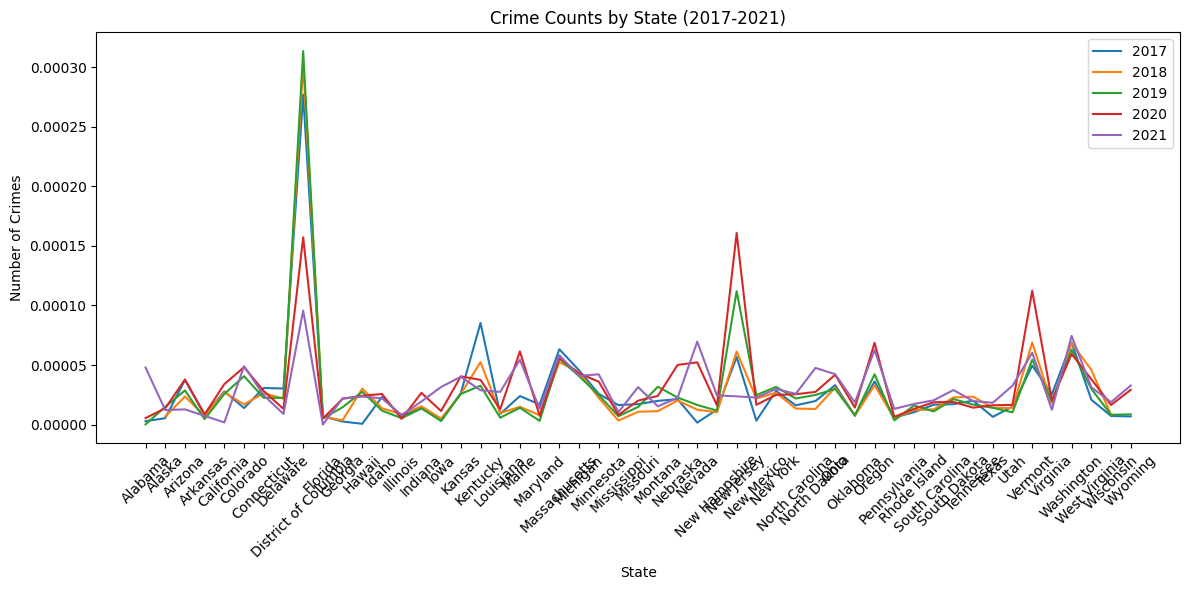

In [95]:
# 연도별 주별 범죄 발생 건 수 데이터셋 준비
crime_counts_2017 = normalized_dataset_2017.groupby('state_name')['hate_crime_case_normalized'].sum()
crime_counts_2018 = normalized_dataset_2018.groupby('state_name')['hate_crime_case_normalized'].sum()
crime_counts_2019 = normalized_dataset_2019.groupby('state_name')['hate_crime_case_normalized'].sum()
crime_counts_2020 = normalized_dataset_2020.groupby('state_name')['hate_crime_case_normalized'].sum()
crime_counts_2021 = normalized_dataset_2021.groupby('state_name')['hate_crime_case_normalized'].sum()

# 시각화
plt.figure(figsize=(12, 6))

# 선 그래프(line plot)
plt.plot(crime_counts_2017.index, crime_counts_2017.values, label='2017')
plt.plot(crime_counts_2018.index, crime_counts_2018.values, label='2018')
plt.plot(crime_counts_2019.index, crime_counts_2019.values, label='2019')
plt.plot(crime_counts_2020.index, crime_counts_2020.values, label='2020')
plt.plot(crime_counts_2021.index, crime_counts_2021.values, label='2021')

plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts by State (2017-2021)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
# 데이터프레임과 주(State) 정보 매핑
data_2017 = normalized_dataset_2017[['state_name', 'hate_crime_case_normalized']]
data_2018 = normalized_dataset_2018[['state_name', 'hate_crime_case_normalized']]
data_2019 = normalized_dataset_2019[['state_name', 'hate_crime_case_normalized']]
data_2020 = normalized_dataset_2020[['state_name', 'hate_crime_case_normalized']]
data_2021 = normalized_dataset_2021[['state_name', 'hate_crime_case_normalized']]

# 시각화 - 2017
fig_2017 = px.choropleth(data_2017, locations='state_name', locationmode='USA-states', color='hate_crime_case_normalized',
                         title='Normalized Hate Crime Cases by State (2017)', scope="usa", color_continuous_scale='YlOrRd',
                         range_color=(0, 0.00001))
fig_2017.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# 시각화 - 2018
fig_2018 = px.choropleth(data_2018, locations='state_name', locationmode='USA-states', color='hate_crime_case_normalized',
                         title='Normalized Hate Crime Cases by State (2018)', scope="usa", color_continuous_scale='YlOrRd',
                         range_color=(0, 0.00001))
fig_2018.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# 시각화 - 2019
fig_2019 = px.choropleth(data_2019, locations='state_name', locationmode='USA-states', color='hate_crime_case_normalized',
                         title='Normalized Hate Crime Cases by State (2019)', scope="usa", color_continuous_scale='YlOrRd',
                         range_color=(0, 0.00001))
fig_2019.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# 시각화 - 2020
fig_2020 = px.choropleth(data_2020, locations='state_name', locationmode='USA-states', color='hate_crime_case_normalized',
                         title='Normalized Hate Crime Cases by State (2020)', scope="usa", color_continuous_scale='YlOrRd',
                         range_color=(0, 0.00001))
fig_2020.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# 시각화 - 2021
fig_2021 = px.choropleth(data_2021, locations='state_name', locationmode='USA-states', color='hate_crime_case_normalized',
                         title='Normalized Hate Crime Cases by State (2021)', scope="usa", color_continuous_scale='YlOrRd',
                         range_color=(0, 0.00001))
fig_2021.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# 시각화 결과 출력
fig_2017.show()
fig_2018.show()
fig_2019.show()
fig_2020.show()
fig_2021.show()

## 정규화했더니 값 범위가 너무 작아서 거의 표시가 안 나요...